<a href="https://colab.research.google.com/github/VaeriaBautista/Simulaci-n-I/blob/main/Metodo_de_las_12_Uniformes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importamos las sig librerias:
import numpy as np #Para el cálculo numérico
import matplotlib.pyplot as plt #Para la creación de gráficos y visualizaciones de datos
from scipy import stats #Para calcular media, mediana, desviación estándar, cuartiles, momentos de la distribución

In [2]:
# Parámetros
mu = 2  # Media deseada
sigma = 3  # Desviación estándar deseada
n_muestras = 10000  # Número de valores aleatorios a generar

In [3]:
# Función para generar números aleatorios con el método de las 12 uniformes
def doce(n, mu, sigma):
    # Se generan 12 números aleatorios uniformes para cada muestra
    R = np.random.random((n, 12))

    # Calcular la suma de los 12 aleatorios - 6 para cada muestra
    Z = np.sum(R, axis=1) - 6

    # Aplicar la transformación X = mu + sigma * Z
    X = mu + sigma * Z

    return X

In [4]:
# Generar los números aleatorios
numeros_generados = doce(n_muestras, mu, sigma)

# Calcular estadísticas de la muestra generada
media = np.mean(numeros_generados)
desv_std = np.std(numeros_generados)

In [5]:
#Imprimos los valores de la media y la varianza
print("Media :", media)
print("Desviación estándar :", desv_std)

Media : 2.041376549448375
Desviación estándar : 3.025849818125798


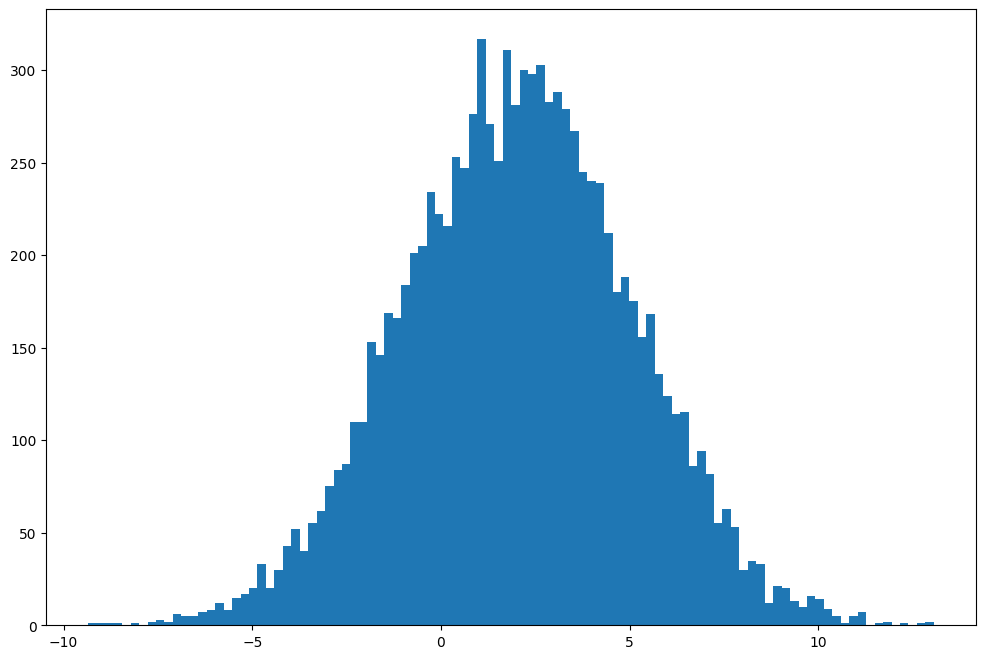

In [6]:
# Crear histograma
plt.figure(figsize=(12, 8))

# Histograma de los datos generados
counts, bins, _ = plt.hist(numeros_generados, bins=100) #distribucion generada

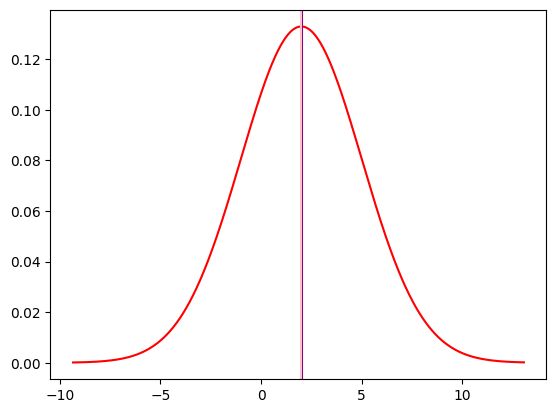

In [10]:
# Curva de la distribución normal teórica
x = np.linspace(min(bins), max(bins), 1000)
pdf_teorica = stats.norm.pdf(x, mu, sigma)
plt.plot(x, pdf_teorica, 'r-')

# Añadimos las líneas verticales para la media generada y teórica
plt.axvline(media, color='purple')
plt.axvline(mu, color='pink')

In [8]:
# Realizar prueba de normalidad
stat, p_valor = stats.shapiro(np.random.choice(numeros_generados, size=min(5000, n_muestras), replace=False))
print("\nPrueba de normalidad :")
print(f"  - Estadístico: {stat:.6f}")
print(f"  - Valor p: {p_valor:.6f}")
print(f"  - {'Los datos parecen seguir una distribución normal (no se rechaza H0)' if p_valor > 0.05 else 'Los datos no siguen una distribución normal (se rechaza H0)'}")

plt.tight_layout()
plt.show()


Prueba de normalidad :
  - Estadístico: 0.999713
  - Valor p: 0.746103
  - Los datos parecen seguir una distribución normal (no se rechaza H0)


<Figure size 640x480 with 0 Axes>